*This notebook is about **Docker Image, Dockerfile, Docker Network, Docker Volume***

# 4. Docker Image

* Key concepts:
  * **Layers**: Docker Image được tạo từ nhiều lớp (layers), mỗi lớp ghi lại các thay đổi trên filesystem (thêm file, cài package,..)
  * **Base Image**: nền tảng ban đầu của image, thường là một hđh tối giản (`ubuntu`, `alpine`,..).
  * **Parent Image**: là image dùng để xây dựng image mới, có thể base image là một image tùy chỉnh khác
  * **Image Tags**: Định danh và versioning cho image (vd: node:18, mysql:8.0)
  * **Image ID**: mã hash duy nhất để nhận diện image trong hệ thống Docker

## 4.1 Working with Docker Images

* Listing Images

> `docker images`  
> `docker images ls` (more verbose command)

* **Pulling** images from Docker Hub

> `docker pull <image_name>:<tag>`

if no tag is specified, pull **latest**

* Running Containers from Image

> `docker run <image_name>:<tag>`

* Image Information

> `docker inspect <image_name>:<tag>`

* Removing Images

> `docker rmi <image_name>:<tag>`

> `docker image rm <image_name>:<tag>`

> *# Remove all unused images*  
> `docker image prune`

### Building Custom Image

* Using Dockerfile

1️⃣ Create a file named **Dockerfile** with no extension

2️⃣ Define the instructions to build image  
Ex:  
> **FROM** ubuntu:20.04  
> **RUN** apt-get update && apt-get install -y nginx  
> **COPY** ./my-nginx.conf /etc/nginx/nginx.conf  
> **EXPOSE** 80  
> **CMD** ["nginx", "-g", "daemon off;"]  


3️⃣ Build image  
> `docker build -t my-nginx:v1`

* Building from a **Running Container**

1️⃣ Make changes to a running container

2️⃣ Create a new image from the container:  
> `docker commit <container_id> my-new-image:tag`

### Image tagging

* Tag an existing image
> `docker tag <source_image>:<tag> <target_image>:<tag>`

Ex:  
> `docker tag my-nginx:v1 my-dockerhub-username/my-nginx:v1`

### Pushing Images to Docker Hub

* Log in to Docker Hub:
> `docker login`

* Push:
> `docker push my-dockerhub-username/my-nginx:v1`

### Image Layers and Caching

🚀 **Layers is crucial for optimizing image builds**

1️⃣ Each instruction in a Dockerfile creates a new layer.

2️⃣ Layers are **cached and reused** in subsequent build

3️⃣ Ordering instructions from **least to most frequently** changing can speed up builds

Example of leveraging caching:

 ❗ Không nên để thế này:  

> **FROM** ubuntu:20.04  
> **COPY** ./static-files /var/www/html  
> **COPY** ./config-files /etc/nginx  
> **RUN** apt-get update && apt-get install -y nginx  


📌 Nếu sửa mã nguồn, Docker build lại tất cả, phải chạy lại apt-get update và apt-get install.

> **FROM** ubuntu:20.04  
> **RUN** apt-get update && apt-get install -y nginx  
> **COPY** ./static-files /var/www/html  
> **COPY** ./config-files /etc/nginx

📌 Nếu chỉ sửa code, Docker chỉ build lại phần cuối

### Multi-stage Builds

* Giúp **giảm kích thước image** bằng cách sử dụng nhiều giai đoạn (**stages**) để build
* Chỉ copy những file **cần thiết** từ stage trước vào stage cuối, bỏ qua phần ko quan trọng (thư viện build, file tạm, ...)
* **Tối ưu hiệu suất** và **Bảo mật**

Ex: Không dùng Multi-Stage (image lớn, không tối ưu)    
> **FROM** golang:1.20   # Base image với Go  
> **WORKDIR** /app  
> **COPY** . .  
> **RUN** go build -o myapp   # Biên dịch ứng dụng  
> **CMD** ["./myapp"]

*build: Multi_stage\yolo-app_no_multi_stage*

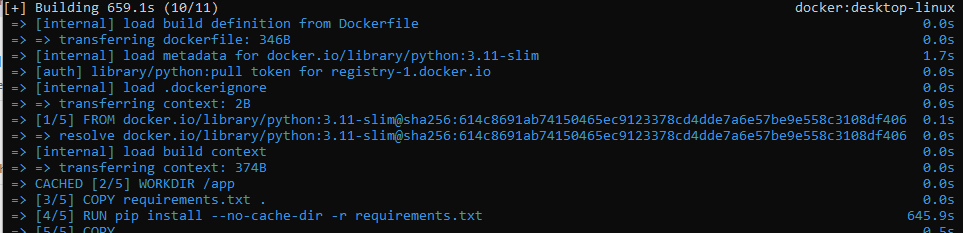

* Mỗi lần build phải pip install rất lâu -> > 600s

* Total time:  

* Total size:  

*build: Multi_stage\yolo-app*